In [ ]:
#EDA 1

df = pd.read_csv('BIKE DETAILS.csv')


In [ ]:
#EDA 1
print(df.head())

                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  


In [ ]:
#EDA 1
#Question 1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

price_range = df['selling_price'].max() - df['selling_price'].min()
print(f"Range of Selling Prices: {price_range}")

Range of Selling Prices: 755000


In [ ]:
#EDA 1
#Question 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

median_price = df['selling_price'].median()
print(f"Median Selling Price: {median_price}")

Median Selling Price: 45000.0


In [ ]:
#EDA 1
#Question 3

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

common_seller_type = df['seller_type'].mode()[0]
print(f"Most Common Seller Type: {common_seller_type}")

Most Common Seller Type: Individual


In [ ]:
#EDA 1
#Question 4

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bikes_above_50k = df[df['km_driven'] > 50000].shape[0]
print(f"Bikes Driven More Than 50,000 Kilometers: {bikes_above_50k}")

Bikes Driven More Than 50,000 Kilometers: 170


In [ ]:
#EDA 1
#Question 5

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

avg_km_by_ownership = df.groupby('owner')['km_driven'].mean()
print("Average km_driven by Ownership Type:")
print(avg_km_by_ownership)

Average km_driven by Ownership Type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
#EDA 1
#Question 6

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

proportion_old_bikes = (df[df['year'] <= 2015].shape[0] / df.shape[0]) * 100
print(f"Proportion of Bikes from 2015 or Older: {proportion_old_bikes:.2f}%")

Proportion of Bikes from 2015 or Older: 56.64%


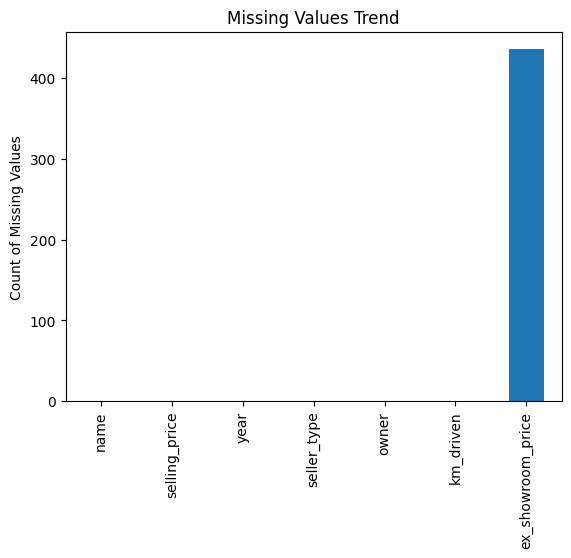

In [ ]:
#EDA 1
#Question 7

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

missing_values = df.isnull().sum()
missing_values.plot(kind='bar', title='Missing Values Trend')
plt.ylabel('Count of Missing Values')
plt.show()

In [ ]:
#EDA 1
#Question 8

highest_ex_showroom = df.loc[df['ex_showroom_price'].idxmax()]
highest_price_bike = highest_ex_showroom['name']
highest_price_value = highest_ex_showroom['ex_showroom_price']
print(f"Highest Ex-showroom Price: {highest_price_value} for {highest_price_bike}")

Highest Ex-showroom Price: 1278000.0 for Harley-Davidson Street Bob


In [ ]:
#EDA 1
#Question 9

total_bikes_by_seller = df['seller_type'].value_counts()
print("Total Number of Bikes Listed by Each Seller Type:")
print(total_bikes_by_seller)

Total Number of Bikes Listed by Each Seller Type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


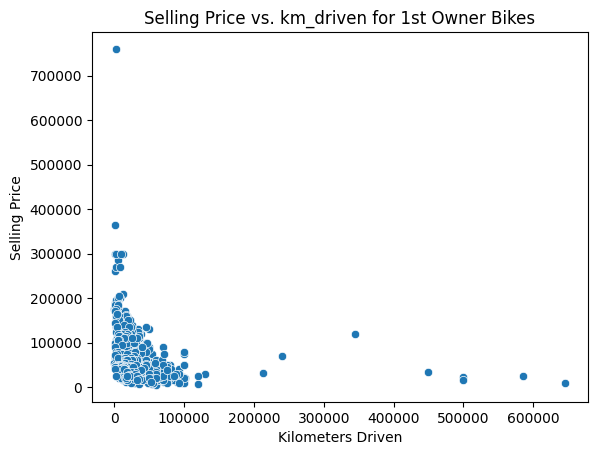

In [ ]:
#EDA 1
#Question 10

first_owner_bikes = df[df['owner'] == '1st owner']
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')
plt.title('Selling Price vs. km_driven for 1st Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
#EDA 1
#Question 11

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(f"Number of records after removing outliers: {df_no_outliers.shape[0]}")

Number of records after removing outliers: 1022


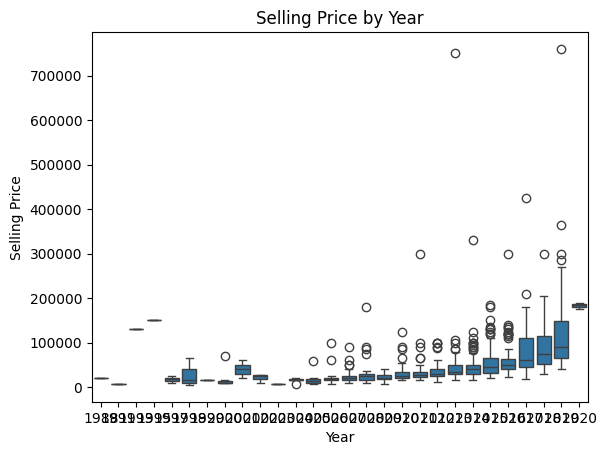

In [ ]:
#EDA 1
#Question 12

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='year', y='selling_price')
plt.title('Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
#EDA 1
#Question 13

current_year = 2023
df['age'] = current_year - df['year']
avg_depreciation = df.groupby('age')['selling_price'].mean()
print("Average Selling Price by Age:")
print(avg_depreciation)

Average Selling Price by Age:
age
3     183333.333333
4     119689.511628
5      87660.374046
6      78894.736842
7      58469.018692
8      56500.000000
9      48668.131868
10     51136.986301
11     35748.400000
12     35655.721311
13     31793.333333
14     22267.857143
15     34289.285714
16     24927.586207
17     23380.000000
18     16978.571429
19     15100.000000
20      8000.000000
21     20666.666667
22     40000.000000
23     20833.333333
24     15000.000000
25     28333.333333
26     17500.000000
28    150000.000000
30    130000.000000
32      6000.000000
35     20000.000000
Name: selling_price, dtype: float64


In [ ]:
#EDA 1
#Question 14

avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
avg_price_by_year.columns = ['year', 'avg_selling_price']

df = df.merge(avg_price_by_year, on='year')

significant_bikes = df[df['selling_price'] > df['avg_selling_price'] * 1.2]

significant_bike_names = significant_bikes[['name', 'selling_price', 'year', 'avg_selling_price']]
print("Bikes Priced Significantly Above Average Price for Their Manufacturing Year:")
print(significant_bike_names)

Bikes Priced Significantly Above Average Price for Their Manufacturing Year:
                                      name  selling_price  year  \
0                Royal Enfield Classic 350         175000  2019   
2      Royal Enfield Classic Gunmetal Grey         150000  2018   
7     Royal Enfield Bullet 350 [2007-2011]         180000  2008   
13                           Yamaha YZF R3         365000  2019   
17                        Yamaha YZF R15 S          40000  2010   
...                                    ...            ...   ...   
984              Royal Enfield Classic 500          95000  2014   
985              Royal Enfield Classic 500          90000  2011   
1005                    TVS Apache RTR 160          60000  2014   
1008                    Bajaj Pulsar 220 F          52000  2012   
1023                Bajaj Avenger 220 dtsi          45000  2012   

      avg_selling_price  
0         119689.511628  
2          87660.374046  
7          34289.285714  
13        1196

In [ ]:
#EDA 2

df = pd.read_csv('Car Sale.csv')

In [ ]:
#EDA 2
#Question 1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

avg_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
avg_price_per_dealer.columns = ['Dealer_Name', 'Average_Price']
print(avg_price_per_dealer)

                                        Dealer_Name  Average_Price
0               Buddy Storbeck's Diesel Service Inc   27217.261563
1                                  C & M Motors Inc   28111.755200
2                                       Capitol KIA   28189.703822
3                                 Chrysler Plymouth   27555.526400
4                            Chrysler of Tri-Cities   28123.091054
5                                     Classic Chevy   28602.014446
6                           Clay Johnson Auto Sales   27816.027113
7                                Diehl Motor CO Inc   27993.929487
8                             Enterprise Rent A Car   28312.580800
9                        Gartner Buick Hyundai Saab   28247.621019
10                              Hatfield Volkswagen   27853.712242
11                                  Iceberg Rentals   28522.958533
12                     McKinney Dodge Chrysler Jeep   27684.096979
13                      Motor Vehicle Branch Office   27956.73

In [ ]:
#EDA 2
#Question 2

price_variation = df.groupby('Company')['Price ($)'].std().reset_index()
highest_variation_brand = price_variation.loc[price_variation['Price ($)'].idxmax()]
print(f"Brand with Highest Price Variation: {highest_variation_brand['Company']} with variation {highest_variation_brand['Price ($)']}")

Brand with Highest Price Variation: Lincoln with variation 19658.050211265567


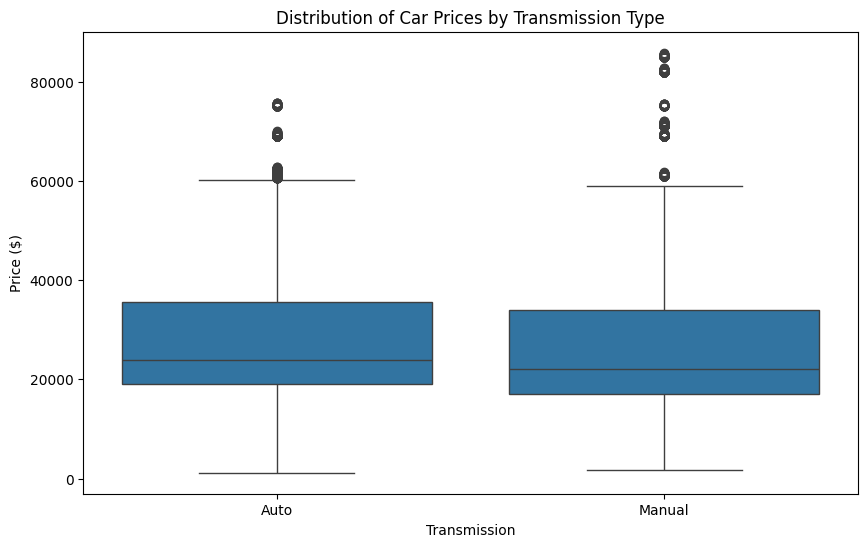

In [ ]:
#EDA 2
#Question 3

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title('Distribution of Car Prices by Transmission Type')
plt.show()

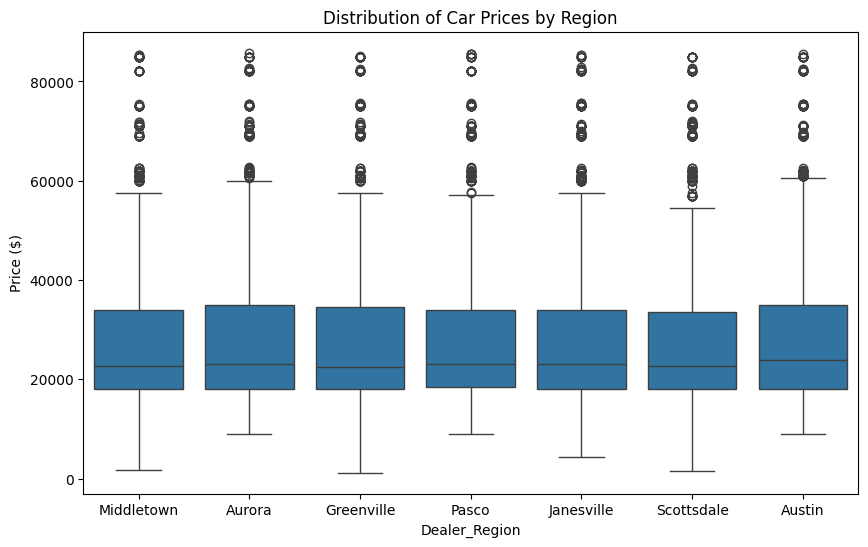

In [ ]:
#EDA 2
#Question 4

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title('Distribution of Car Prices by Region')
plt.show()

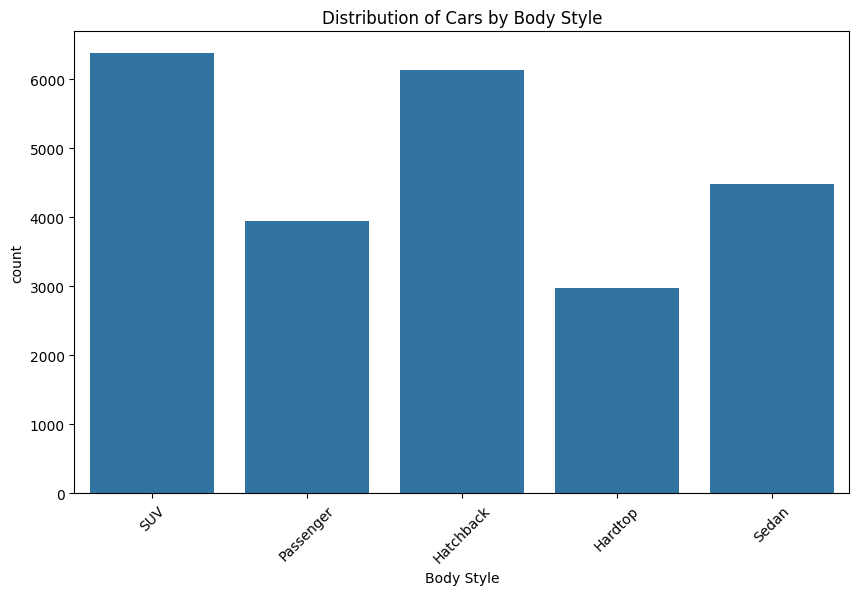

In [ ]:
#EDA 2
#Question 5

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Body Style')
plt.title('Distribution of Cars by Body Style')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


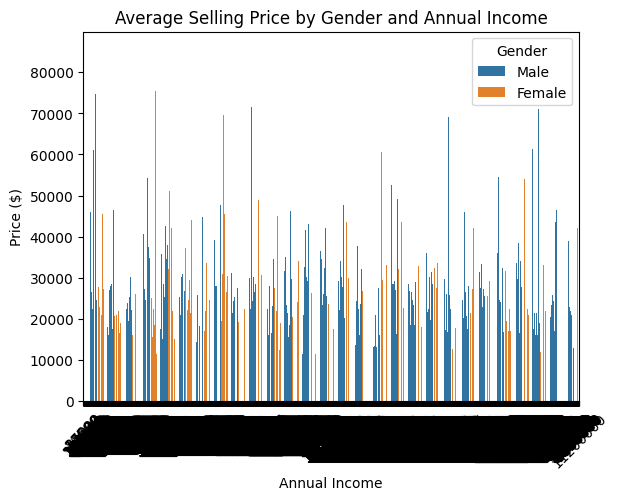

In [ ]:
#EDA 2
#Question 6

avg_price_by_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
sns.barplot(data=avg_price_by_gender_income, x='Annual Income', y='Price ($)', hue='Gender')
plt.title('Average Selling Price by Gender and Annual Income')
plt.xticks(rotation=45)
plt.show()

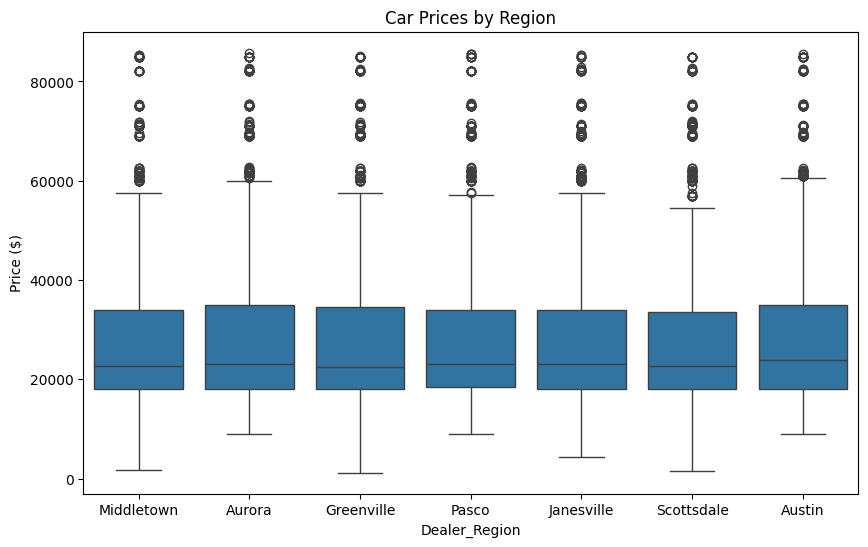

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64


In [ ]:
#EDA 2
#Question 7

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title('Car Prices by Region')
plt.show()

cars_sold_by_region = df['Dealer_Region'].value_counts()
print(cars_sold_by_region)

In [ ]:
#EDA 2
#Question 8

avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().reset_index()
print(avg_price_by_engine)

                      Engine     Price ($)
0  DoubleÂ Overhead Camshaft  28248.525972
1          Overhead Camshaft  27914.710631


<ipython-input-30-2f7aa5c7f91f>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income_bracket = df.groupby('Income_Bracket')['Price ($)'].mean().reset_index()


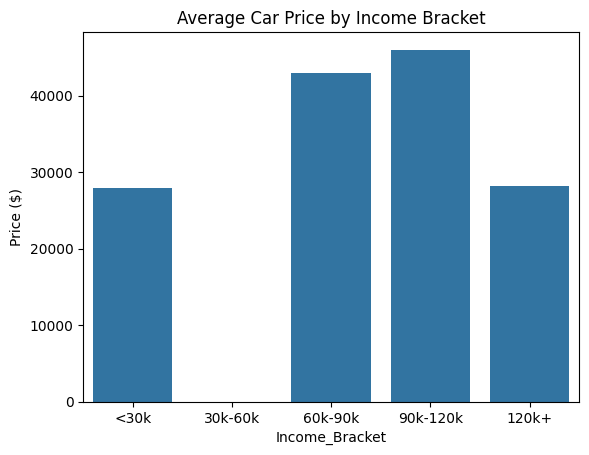

In [ ]:
#EDA 2
#Question 9

bins = [0, 30000, 60000, 90000, 120000, float('inf')]
labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k+']
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)

avg_price_by_income_bracket = df.groupby('Income_Bracket')['Price ($)'].mean().reset_index()
sns.barplot(data=avg_price_by_income_bracket, x='Income_Bracket', y='Price ($)')
plt.title('Average Car Price by Income Bracket')
plt.show()

In [ ]:
#EDA 2
#Question 10

top_models = df['Model'].value_counts().head(5)
print("Top 5 Car Models with Highest Sales:")
print(top_models)

top_models_list = top_models.index.tolist()
sns

Top 5 Car Models with Highest Sales:
Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


<module 'seaborn' from '/usr/local/lib/python3.11/dist-packages/seaborn/__init__.py'>

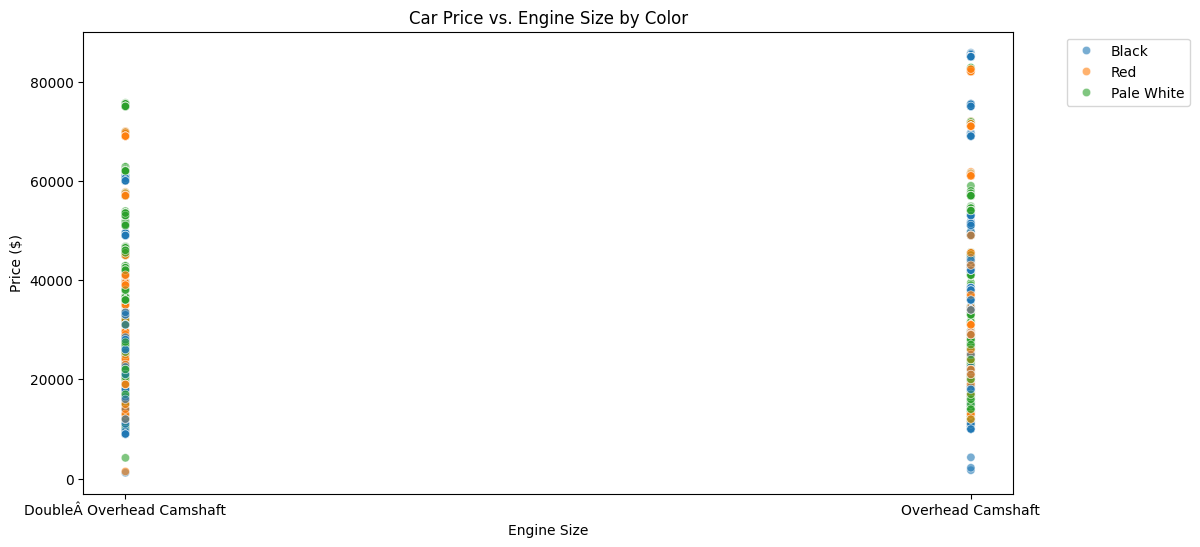

Color with Highest Price Variation: Red with variation 15519.360962404155


In [ ]:
#EDA 2
#Question 11

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Engine', y='Price ($)', hue='Color', alpha=0.6)
plt.title('Car Price vs. Engine Size by Color')
plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

price_variation_by_color = df.groupby('Color')['Price ($)'].std().reset_index()
price_variation_by_color.columns = ['Color', 'Price_Variation']
highest_variation_color = price_variation_by_color.loc[price_variation_by_color['Price_Variation'].idxmax()]
print(f"Color with Highest Price Variation: {highest_variation_color['Color']} with variation {highest_variation_color['Price_Variation']}")

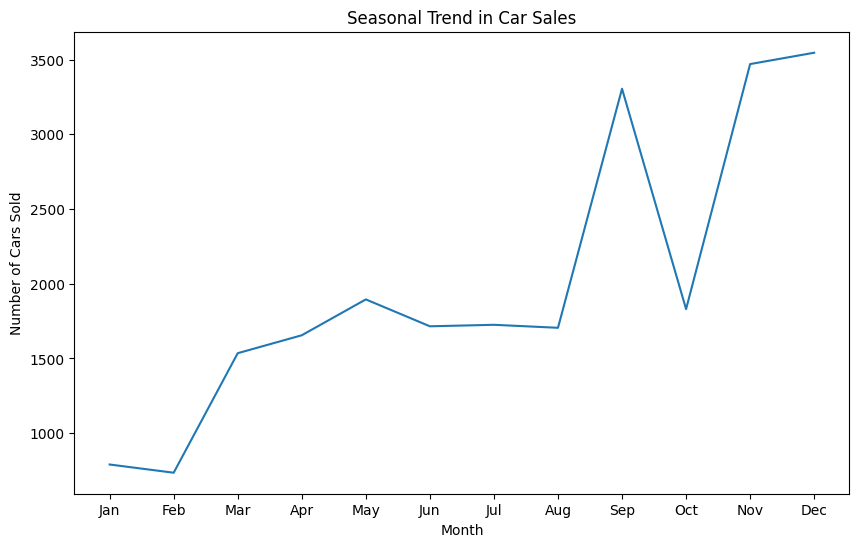

In [ ]:
#EDA 2
#Question 12

df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

sales_per_month = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_per_month.index, y=sales_per_month.values)
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

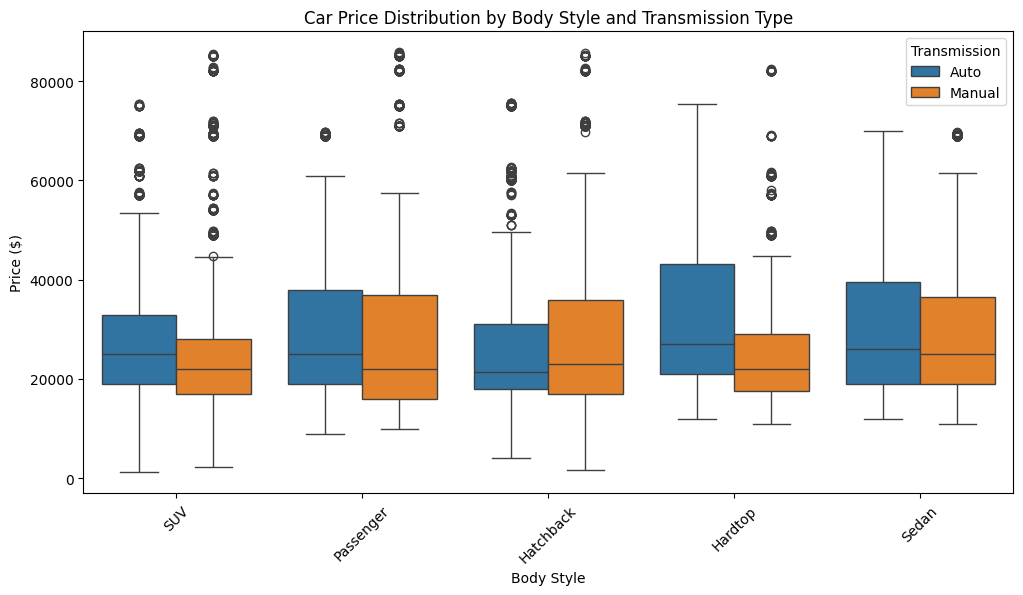

In [ ]:
#EDA 2
#Question 13

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Transmission')
plt.show()

In [37]:
#EDA 3

df = pd.read_csv('amazon.csv')

In [40]:
#EDA 3
#Question 1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_rating_count_by_category = df.loc[df.groupby('category')['rating_count'].idxmax()][['category', 'product_name', 'rating_count']]
print(top_rating_count_by_category)

                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...        7,222  
772   H

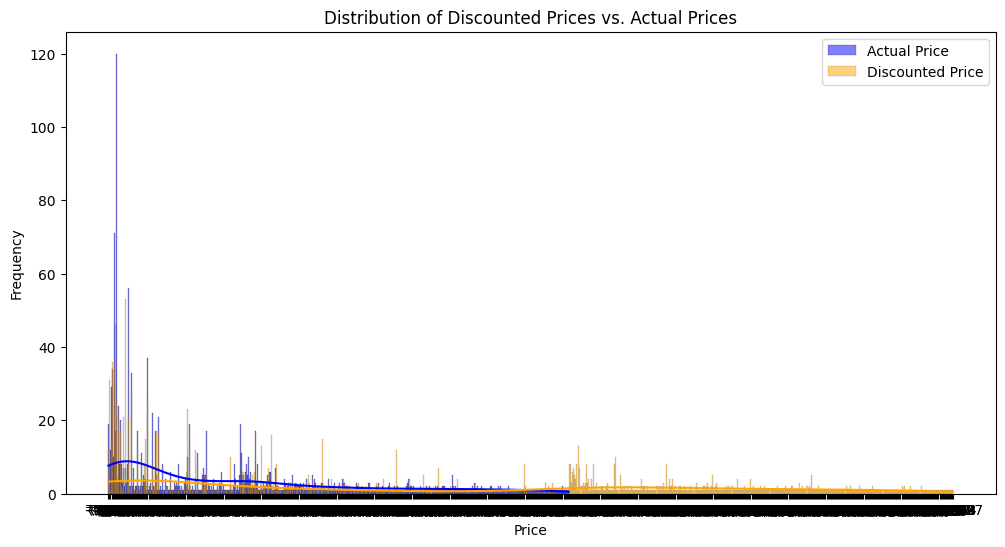

In [43]:
#EDA 3
#Question 3

plt.figure(figsize=(12, 6))

sns.histplot(df['actual_price'], bins=30, kde=True, color='blue', label='Actual Price', alpha=0.5)

sns.histplot(df['discounted_price'], bins=30, kde=True, color='orange', label='Discounted Price', alpha=0.5)

plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [44]:
#EDA 3
#Question 4

print(df['discount_percentage'].dtype)

df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

print(df['discount_percentage'].isnull().sum())

avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()
avg_discount_by_category.columns = ['Category', 'Average_Discount_Percentage']
print(avg_discount_by_category)

object
1465
                                              Category  \
0    Car&Motorbike|CarAccessories|InteriorAccessori...   
1    Computers&Accessories|Accessories&Peripherals|...   
2    Computers&Accessories|Accessories&Peripherals|...   
3    Computers&Accessories|Accessories&Peripherals|...   
4    Computers&Accessories|Accessories&Peripherals|...   
..                                                 ...   
206  OfficeProducts|OfficePaperProducts|Paper|Stati...   
207  OfficeProducts|OfficePaperProducts|Paper|Stati...   
208  OfficeProducts|OfficePaperProducts|Paper|Stati...   
209  OfficeProducts|OfficePaperProducts|Paper|Stati...   
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

     Average_Discount_Percentage  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4                            NaN  
..                           ...  
206                          NaN  
207        

In [46]:
#EDA 3
#Question 5

print(df['rating_count'].dtype)

df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

print(df['rating_count'].isnull().sum())

most_popular_products = df.nlargest(10, 'rating_count')[['product_name', 'rating_count']]
print("Most Popular Products:")
print(most_popular_products)

object
1139
Most Popular Products:
                                           product_name  rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
151   Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...         959.0
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...         942.0
214   Crypo™ Universal Remote Compatible with Tata S...         928.0
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...         925.0


In [47]:
#EDA 3
#Question 6

keywords = df['product_name'].str.split(expand=True).stack().value_counts().head(10)
print("Most Popular Product Keywords:")
print(keywords)

Most Popular Product Keywords:
with        718
for         614
|           457
&           432
USB         342
and         310
Cable       306
-           220
Charging    212
Fast        208
Name: count, dtype: int64


In [48]:
#EDA 3
#Question 7

most_popular_reviews = df.nlargest(10, 'rating_count')[['review_title', 'review_content', 'rating_count']]
print("Most Popular Reviews:")
print(most_popular_reviews)

Most Popular Reviews:
                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
1059  Kettle is good but bottle is not good quality,...   
32    Great Cable, Charging Speeds Could Be Better,G...   
151   Great Cable, Charging Speeds Could Be Better,G...   
823   Great Cable, Charging Speeds Could Be Better,G...   
1272  Ok,A good water heater,Easy to use inverter,Go...   
1259  Good product but pipes/installation/plug not i...   
214   Good compatibility,Good Product,Good nice serv...   
1262  It’s a good product in this price.,Nice produc...   

                                         review_content  rating_count  
1279  Does the job well,doesn't work on sand. though...         992.0  
750   Nive,very good batteries received,Like,Good pr...         989.0  
1059  Bottle quality is not good.,Best for hot water...         976.0  
32    Not charging as fast as I'd have e

In [51]:
#EDA 3
#Question 9

print(df['discounted_price'].unique())

df['discounted_price'] = df['discounted_price'].replace({'₹': '', ',': '', '|': ''}, regex=True).astype(float)

print(df['discounted_price'].isnull().sum())

correlation = df[['discounted_price', 'rating']].corr().iloc[0, 1]
print(f"Correlation between Discounted Price and Rating: {correlation:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='discounted_price', y='rating')
plt.title('Correlation between Discounted Price and Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()

[3.99000e+02 1.99000e+02 3.29000e+02 1.54000e+02 1.49000e+02 1.76630e+02
 2.29000e+02 4.99000e+02 2.99000e+02 2.19000e+02 3.50000e+02 1.59000e+02
 3.49000e+02 1.39990e+04 2.49000e+02 1.34900e+04 9.70000e+02 2.79000e+02
 5.90000e+01 1.14990e+04 1.49990e+04 1.79000e+02 3.89000e+02 5.99000e+02
 9.90000e+01 8.99000e+02 3.29990e+04 2.09000e+02 1.99990e+04 9.99000e+02
 3.33000e+02 5.07000e+02 3.09000e+02 1.19900e+03 7.99000e+02 6.99900e+03
 2.30000e+02 6.49000e+02 1.59990e+04 3.48000e+02 3.29900e+04 1.39000e+02
 2.63000e+02 7.99900e+03 1.59900e+03 2.69990e+04 1.15000e+02 1.09010e+04
 1.43400e+03 7.29900e+03 3.25000e+02 2.99990e+04 2.79990e+04 3.09900e+04
 2.69000e+02 2.49990e+04 1.89900e+04 2.90000e+02 3.45000e+02 1.09900e+03
 7.19000e+02 8.49000e+02 2.19990e+04 4.49000e+02 3.79990e+04 7.39000e+03
 2.73100e+02 1.59900e+04 2.10000e+02 1.29900e+03 3.47000e+02 2.28000e+02
 1.49900e+03 8.49900e+03 2.09900e+04 9.99900e+03 4.89000e+02 2.39990e+04
 6.89000e+02 1.69900e+03 6.55000e+02 7.49000e+02 1.

ValueError: could not convert string to float: '|'

In [55]:
#EDA 3
#Question 10

import pandas as pd
from collections import Counter
import re


df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

low_rating_products = df[df['rating'] < 3].nlargest(10, 'rating_count')[['product_name', 'rating', 'rating_count']]
print("Low Ratings with High Rating Counts:")
print(low_rating_products)

low_sales_high_discount = df[(df['discount_percentage'] > 30) & (df['rating_count'] < 50)][['product_name', 'discount_percentage', 'rating_count']]
print("\nHigh Discount Products with Low Sales:")
print(low_sales_high_discount)

all_reviews = ' '.join(df['review_content'].dropna())
words = re.findall(r'\w+', all_reviews.lower())
common_words = Counter(words).most_common(10)
print("\nMost Common Words in Reviews:")
print(common_words)

correlation = df[['discounted_price', 'rating']].corr().iloc[0, 1]
print(f"\nCorrelation between Discounted Price and Rating: {correlation:.2f}")

keywords = df['product_name'].str.split(expand=True).stack().value_counts().head(10)
print("\nMost Popular Product Keywords:")
print(keywords)

Low Ratings with High Rating Counts:
                                           product_name  rating  rating_count
1449  IONIX Tap filter Multilayer | Activated Carbon...     2.9         159.0
1286  MR. BRAND Portable USB Juicer Electric USB Jui...     2.8         109.0
545   SHREENOVA ID116 Plus Bluetooth Fitness Smart W...     2.8          87.0
1356  Green Tales Heat Seal Mini Food Sealer-Impulse...     2.6          24.0
1243  Personal Size Blender, Portable Blender, Batte...     2.3          13.0
1309  Khaitan ORFin Fan heater for Home and kitchen-...     2.0           2.0

High Discount Products with Low Sales:
Empty DataFrame
Columns: [product_name, discount_percentage, rating_count]
Index: []

Most Common Words in Reviews:
[('the', 13910), ('is', 9912), ('it', 9662), ('and', 9454), ('to', 7858), ('i', 7437), ('for', 6582), ('good', 6455), ('a', 6142), ('this', 4919)]

Correlation between Discounted Price and Rating: 0.12

Most Popular Product Keywords:
with        718
for        

In [56]:
#EDA 4
df = pd.read_csv('spotify.csv')

In [57]:
#EDA 4
#Question 1

print("Null values in each column:")
print(df.isnull().sum())

df.dropna(inplace=True)

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)

Null values in each column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 27


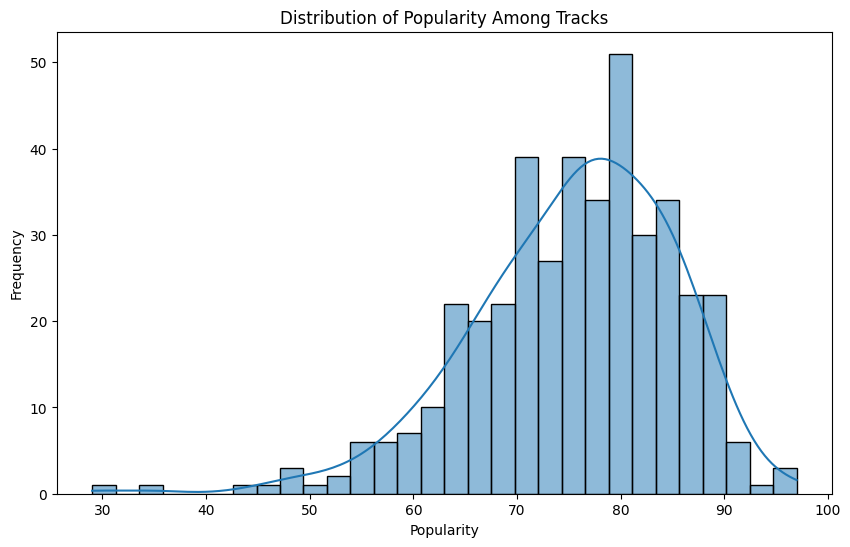

In [58]:
#EDA 4
#Question 2
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True)
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

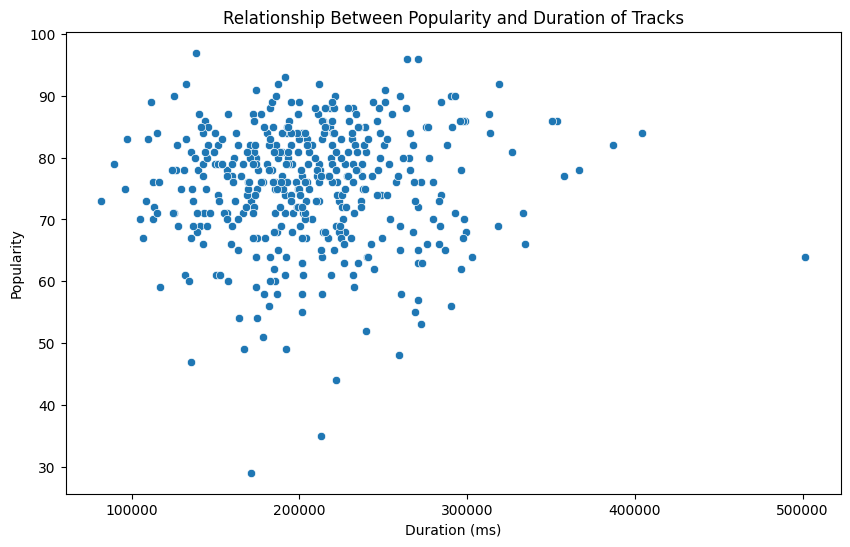

In [59]:
#EDA 4
#Question 3

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity')
plt.title('Relationship Between Popularity and Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

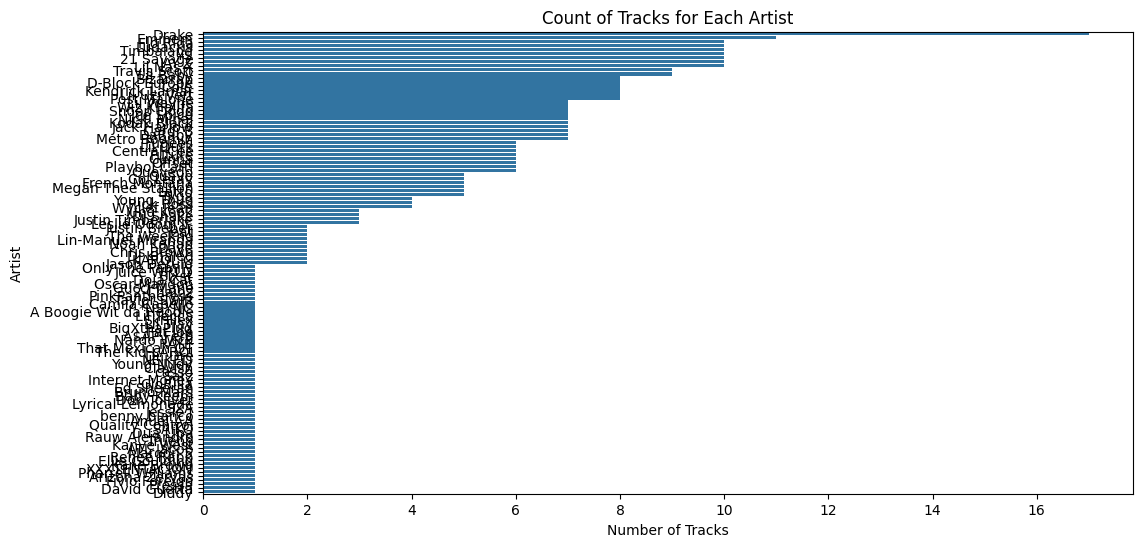

In [60]:
#EDA 4
#Question 4

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Artist', order=df['Artist'].value_counts().index)
plt.title('Count of Tracks for Each Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

In [61]:
#EDA 4
#Question 5

least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [62]:
#EDA 4
#Question 6

top_artists = df['Artist'].value_counts().nlargest(5).index
avg_popularity = df[df['Artist'].isin(top_artists)].groupby('Artist')['Popularity'].mean().reset_index()
avg_popularity.columns = ['Artist', 'Average Popularity']
print("Average Popularity for Top 5 Most Popular Artists:")
print(avg_popularity)

Average Popularity for Top 5 Most Popular Artists:
      Artist  Average Popularity
0      Drake           82.882353
1     Eminem           83.636364
2   Flo Rida           78.000000
3   Ludacris           63.000000
4  Timbaland           69.000000


In [63]:
#EDA 4
#Question 7

for artist in top_artists:
    most_popular_track = df[df['Artist'] == artist].nlargest(1, 'Popularity')[['Track Name', 'Popularity']]
    print(f"Most Popular Track for {artist}:")
    print(most_popular_track)

Most Popular Track for Drake:
                                Track Name  Popularity
0  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Most Popular Track for Eminem:
    Track Name  Popularity
80  Without Me          90
Most Popular Track for Flo Rida:
             Track Name  Popularity
300  Low (feat. T-Pain)          84
Most Popular Track for Ludacris:
       Track Name  Popularity
371  My Chick Bad          67
Most Popular Track for Timbaland:
        Track Name  Popularity
380  The Way I Are          85


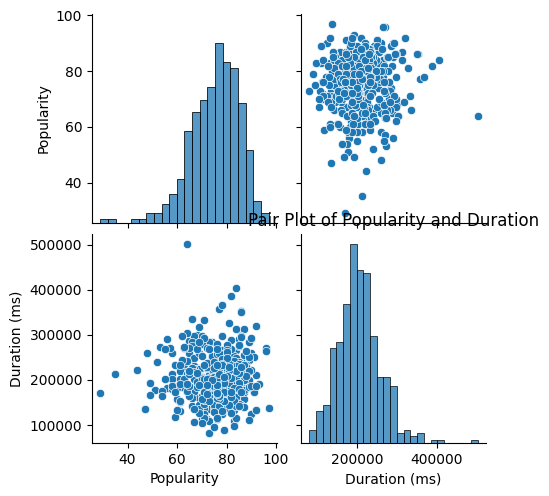

In [64]:
#EDA 4
#Question 8

sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.title('Pair Plot of Popularity and Duration')
plt.show()

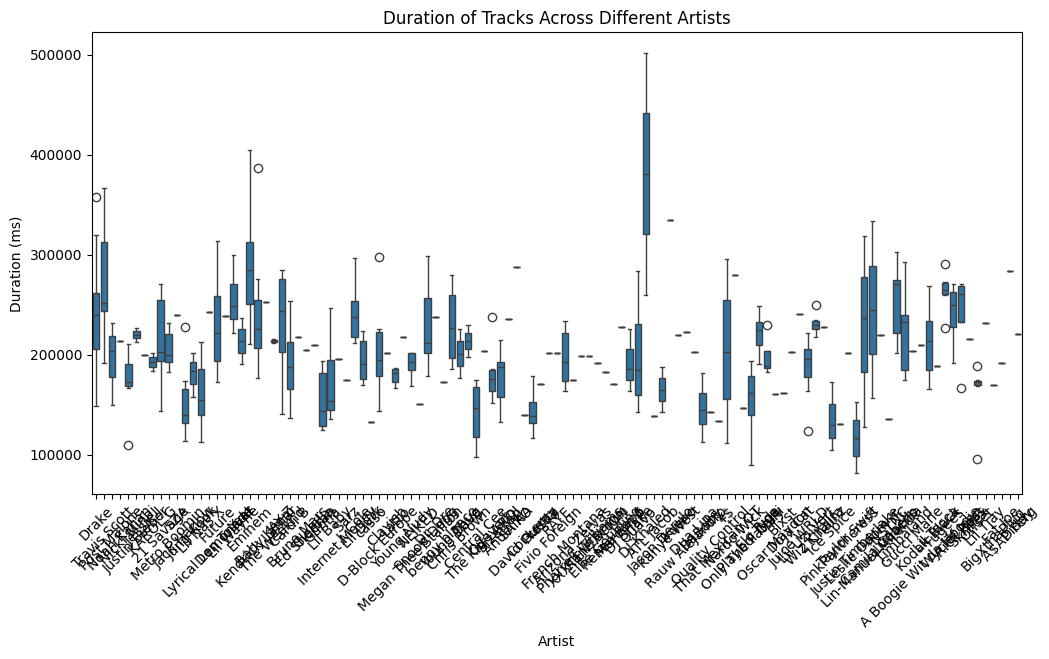

In [65]:
#EDA 4
#Question 9

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Artist', y='Duration (ms)')
plt.title('Duration of Tracks Across Different Artists')
plt.xticks(rotation=45)
plt.show()

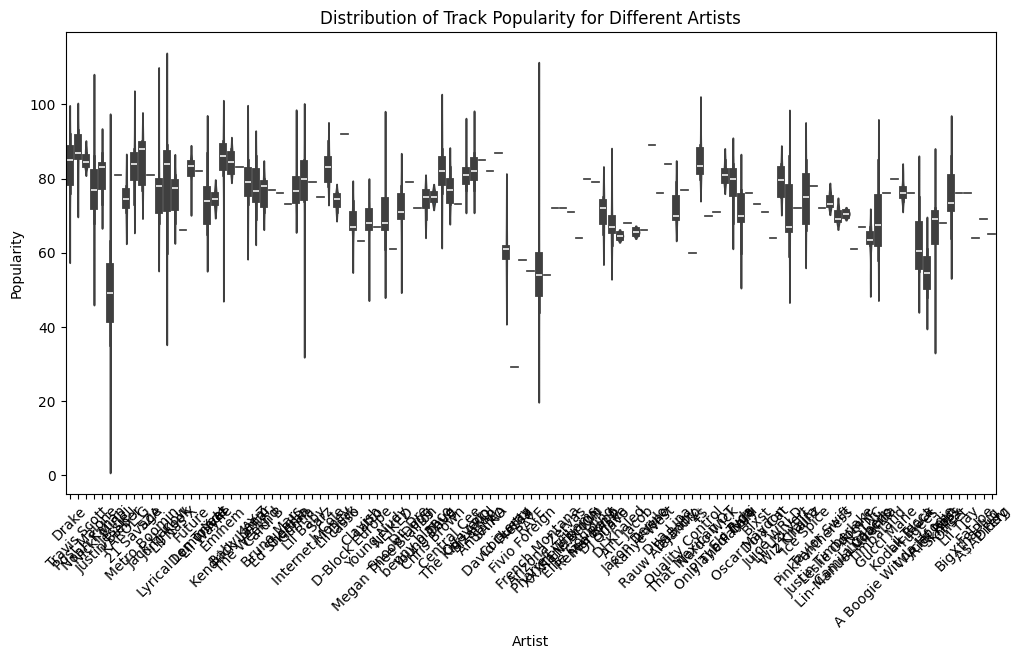

In [66]:
#EDA 4
#Question 10

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Artist', y='Popularity')
plt.title('Distribution of Track Popularity for Different Artists')
plt.xticks(rotation=45)
plt.show()